In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import constants as cnst
from astropy import units as u 
from astropy.coordinates import SkyCoord
from astropy.timeseries import LombScargle
from scipy.optimize import curve_fit as cf

# Answer Number (1):


In [2]:
raw = np.genfromtxt("https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Week-3/Assignment/Clusters.csv", delimiter = ',', dtype ='float64')

index1 = np.where(raw[:,2] == 1)
RA_mean1 = raw[(index1[0]), 0].mean()
DEC_mean1 = raw[(index1[0]), 1].mean()

index2 = np.where(raw[:,2] == 2)
RA_mean2 = raw[(index2[0]), 0].mean()
DEC_mean2 = raw[(index2[0]), 1].mean()

print("1.1: The location of the Globular cluster 1 in (ra,dec) is: (", RA_mean1*u.degree,",", DEC_mean1*u.degree,").\n")
print("1.2: The location of the Globular cluster 2 in (ra,dec) is: (", RA_mean2*u.degree,",", DEC_mean2*u.degree,").\n")
print(112 * "~")

#Calculation of the distance of each of the Messiers from the two clusters
i, r, index = 0, 31, 0
c1 = SkyCoord(ra = RA_mean1*u.degree, dec = DEC_mean1*u.degree, frame='icrs')
c2 = SkyCoord(ra = RA_mean2*u.degree, dec = DEC_mean2*u.degree, frame = 'icrs') 

#Cluster 1 calculation
while i < 110:
    test = c1.separation(SkyCoord.from_name('Messier' + str(i+1))).arcsecond
    if test <= 30:
        if test < r:
            r = test
            index = i+1
    
    i += 1

if index != 0:
    print("\n2.1: The nearest Messier from Globular cluster 1 is: Messier", index,'.')

else:
    print("\n2.2: The nearest Messier from Globular cluster 1 does not lie in the", 30*u.arcsecond,"range.") 
    
#Cluster 2 calculation
i, r, test, index = 0, 31, 0, 0

while i < 110:
    test = c2.separation(SkyCoord.from_name('Messier' + str(i+1))).arcsecond
    if test <= 30:
        if test < r:
            r = test
            index = i+1
    
    i += 1

if index != 0:
    print("\n2.2: The nearest Messier from Globular cluster 2 is: Messier", index,'.')
else:
    print("\n2.2: The nearest Messier from Globular cluster 2 does not lie in the", 30*u.arcsecond,"range.")
    

#Saving Messier catalogue in csv
i = 0
dfObj = pd.DataFrame(columns = ['Messier number', 'RA', 'DEC'])

while i < 110:
    dfObj = dfObj.append({'Messier number': str(i+1), 'RA': SkyCoord.from_name('Messier'+str(i+1)).ra.degree, 'DEC': SkyCoord.from_name('Messier'+str(i+1)).dec.degree}, ignore_index=True)
    i += 1
    
dfObj.to_csv("Messiers.csv", index = None)


1.1: The location of the Globular cluster 1 in (ra,dec) is: ( 279.10024840836667 deg , -23.90191594401699 deg ).

1.2: The location of the Globular cluster 2 in (ra,dec) is: ( 158.83323379097496 deg , 65.75444474392995 deg ).

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

2.1: The nearest Messier from Globular cluster 1 is: Messier 22 .

2.2: The nearest Messier from Globular cluster 2 does not lie in the 30.0 arcsec range.


# Answer Number (2):

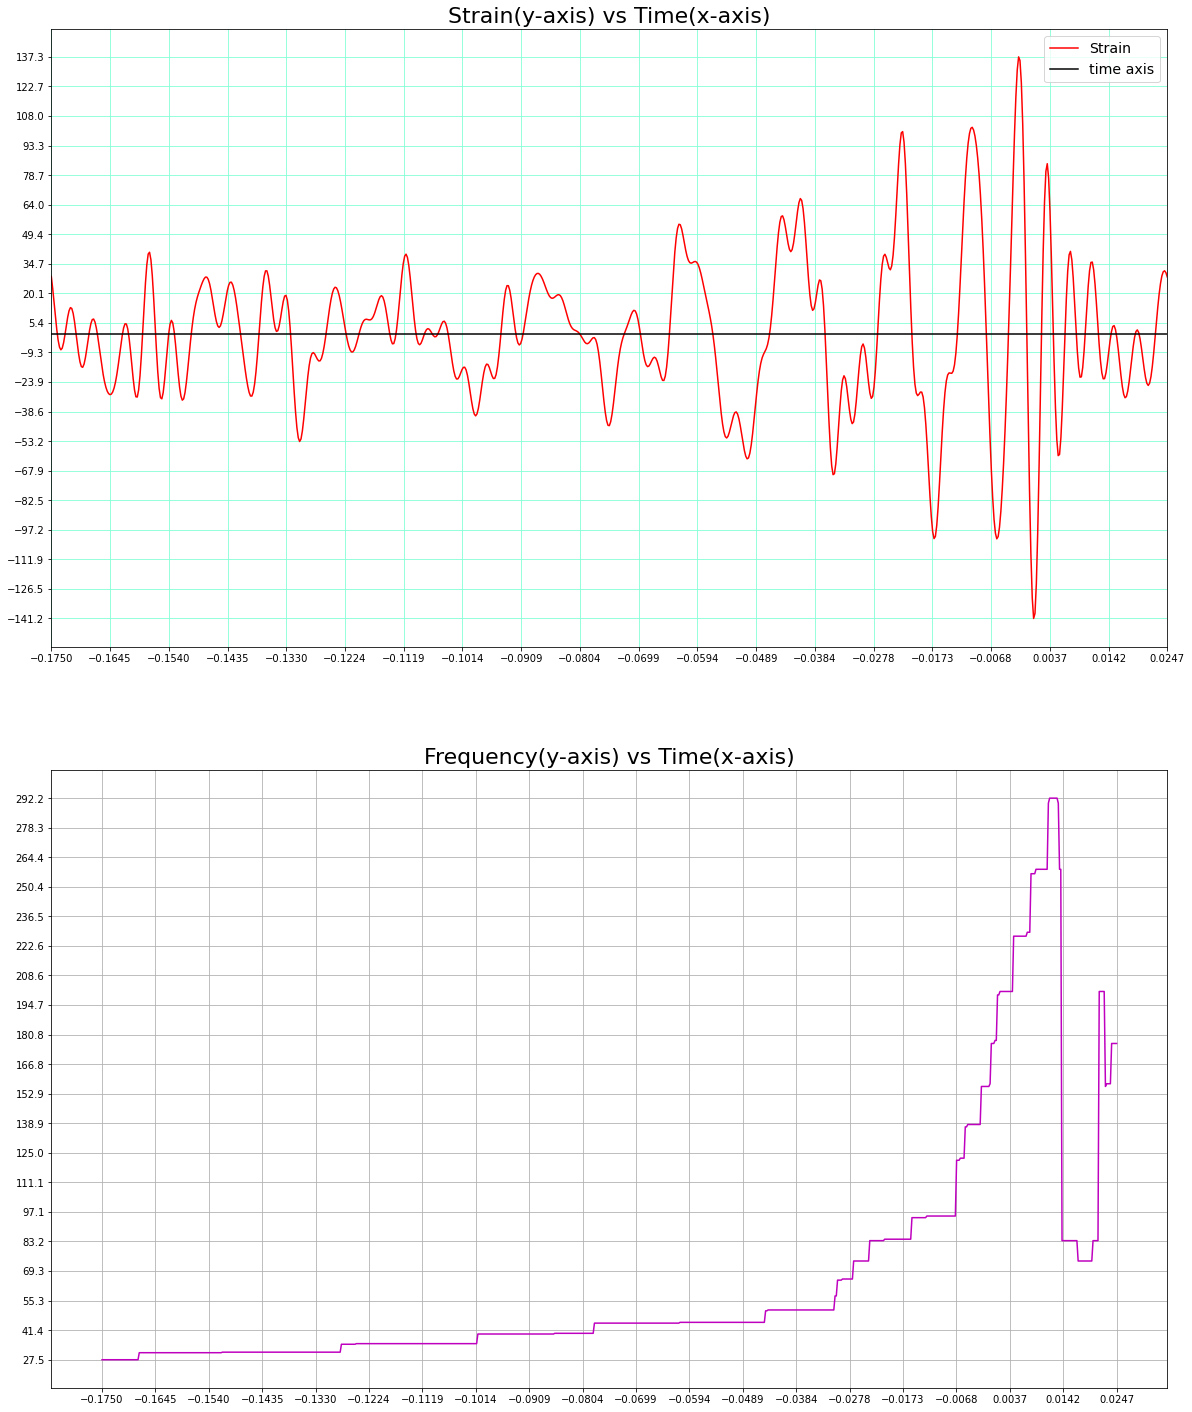

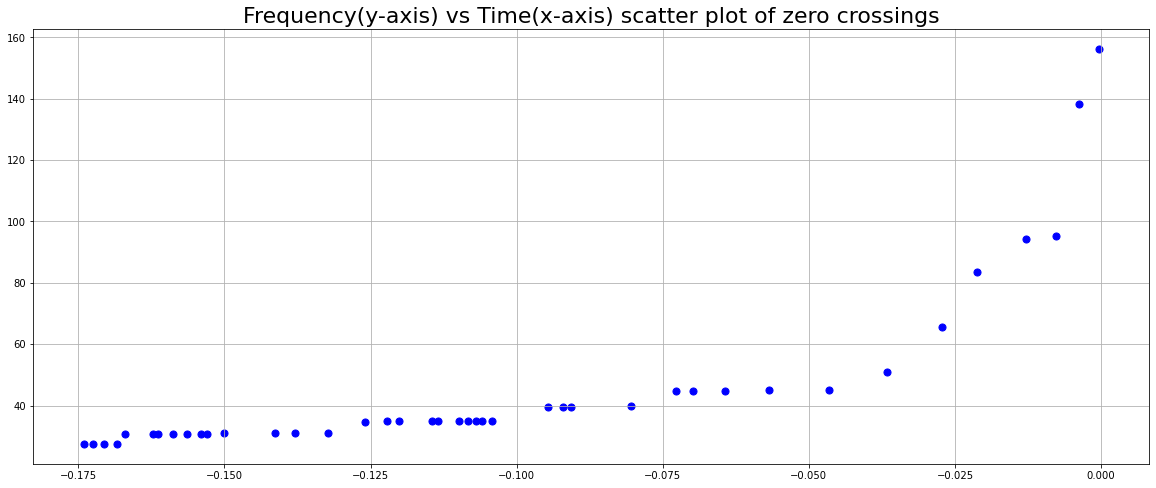

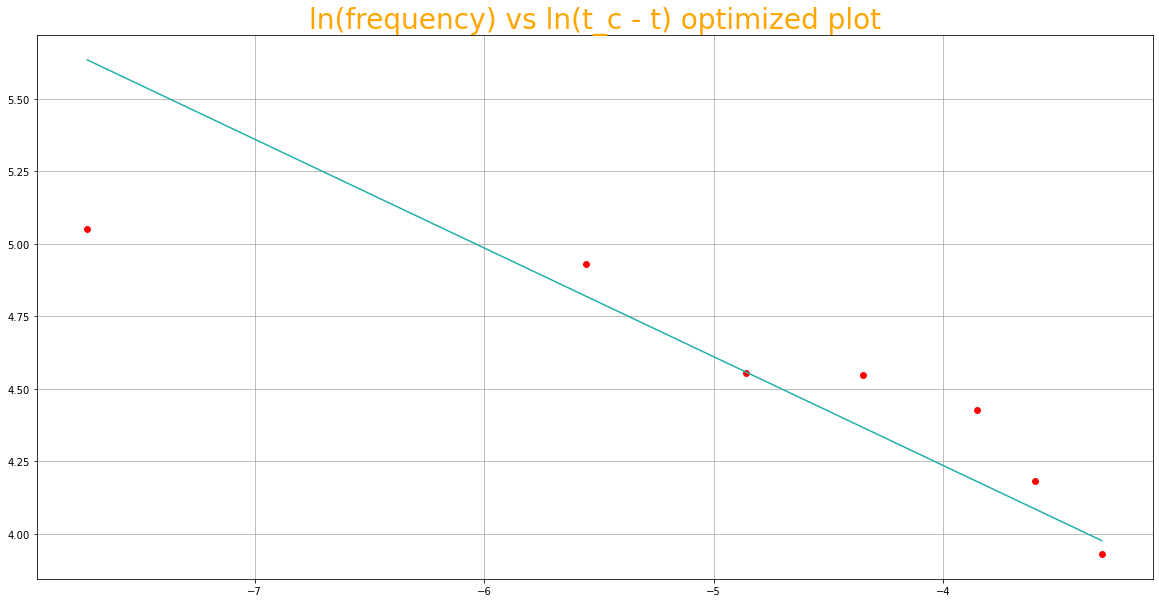

-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-

The chirp mass of the Binary system is : 38.496500904710985 solMass .

-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


In [3]:
data, freq, time = np.loadtxt('https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Week-3/Assignment/GW_data_file.csv',delimiter=',', dtype = 'float_')

#plotting strain v time AND frequency v time plot

x_ticks = np.linspace(np.amin(time), np.amax(time), 20)
y1_ticks = np.linspace(np.amin(data), np.amax(data), 20)
y2_ticks = np.linspace(np.amin(freq), np.amax(freq), 20)


plt.figure(figsize = (20,25))
plt.subplot(2,1,1)
plt.title("Strain(y-axis) vs Time(x-axis)", size = 22)
plt.plot(time, data, c = 'r')
plt.plot(time,np.zeros(819), c = 'k')
plt.legend(['Strain', 'time axis'], fontsize = 14.2)
plt.xlim(np.amin(time), np.amax(time))
plt.xticks(x_ticks)
plt.yticks(y1_ticks)
plt.grid(c = '#7FFFD4')

plt.subplot(2,1,2)
plt.title("Frequency(y-axis) vs Time(x-axis)", size = 22)
plt.plot(time, freq, c = 'm')
plt.xticks(x_ticks)
plt.yticks(y2_ticks)
plt.grid()

plt.show()

#Segregating the indices of zero crossing points. Considering ith element (not (i+1)th element)
i = span1 = 0
while i < len(data)-1:
    if (data[i]*data[i+1] < 0) and (time[i] < 0):
        span1 += 1
    i += 1

index1, i, j = np.zeros(span1, dtype = 'int64'), 0, 0

while i < len(data)-1:
    if (data[i]*data[i+1] < 0) and (time[i] < 0):
        index1[j] = i
        j +=1
    i += 1

#plotting the scatter plot of the zero crossings
plt.figure(figsize = (20,8))
plt.title("Frequency(y-axis) vs Time(x-axis) scatter plot of zero crossings", size = 22)
plt.scatter(time[index1], freq[index1], s = 50, c = 'b')
plt.grid()
plt.show()

#Segregating the indices of points, with frequency > 50 Hz.
i = span2 = 0
while i < len(data)-1:
    if (freq[i] > 50) and (time[i] < 0) and (data[i]*data[i+1] < 0):
        span2 += 1
    i += 1
    
index2, i, j = np.zeros(span2, dtype = 'int64'), 0, 0

while i < len(freq):
    if (freq[i] > 50) and (time[i] < 0) and (data[i]*data[i+1] < 0):
        index2[j] = i
        j +=1
    i += 1


#Curve fitting the chirp mass equation.
def ln(x,M):
    return (-3/8)*((8/3)*np.log(8*np.pi) - np.log(5) + (5/3)*np.log(cnst.G.value/((cnst.c.value)**3)) +5/3*np.log(M) + np.log(-x))
                   
optimized_value, covariance_matrix = cf(ln,time[index2], np.log(freq[index2]))

#Plotting optimized solution
plt.figure(figsize = (20,10))
plt.title("ln(frequency) vs ln(t_c - t) optimized plot", size = 28, c = '#FFA500')
plt.scatter(np.log(-time[index2]), np.log(freq[index2]), s = 35, c = 'r')
plt.plot(np.log(-time[index2]), ln(time[index2], optimized_value[0]), c='#20B2AA')
plt.grid()
plt.show()

print(24 * "-+-")
print("\nThe chirp mass of the Binary system is :", optimized_value[0]*u.kg.to('solMass')*u.solMass, ".\n")
print(24 * "-+-")

# Answer Number (3):

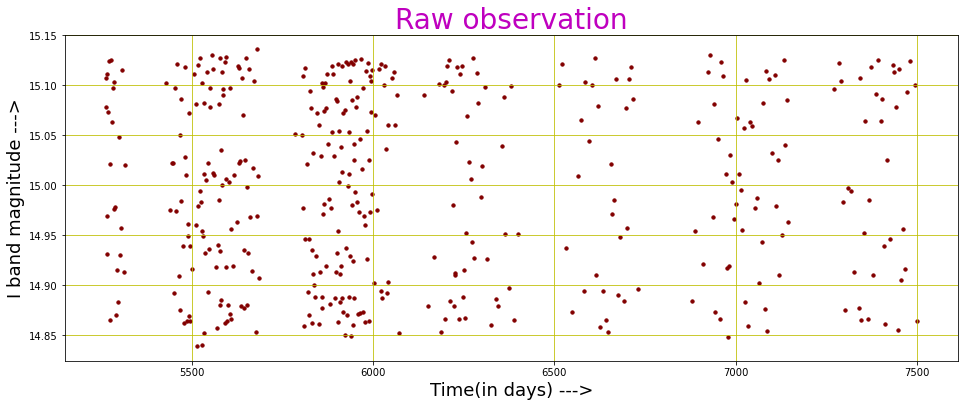

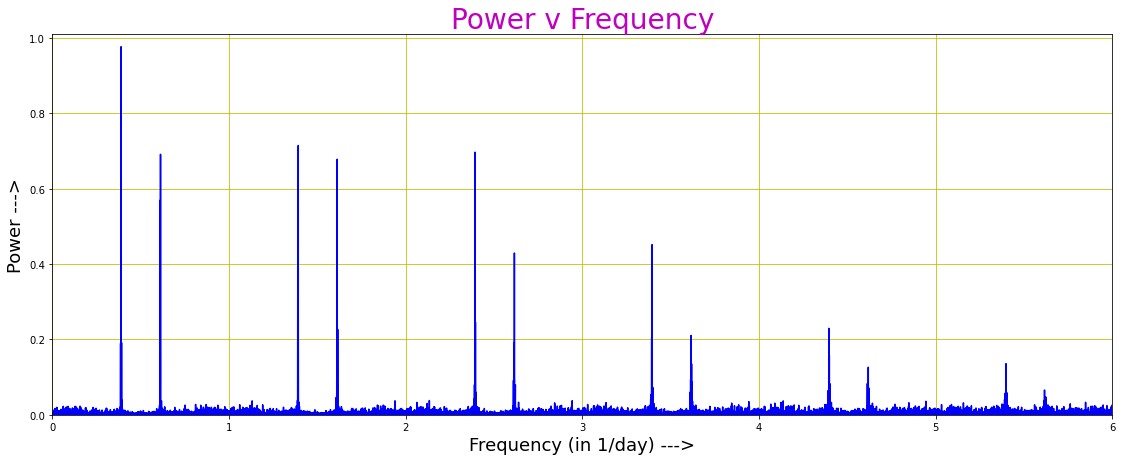

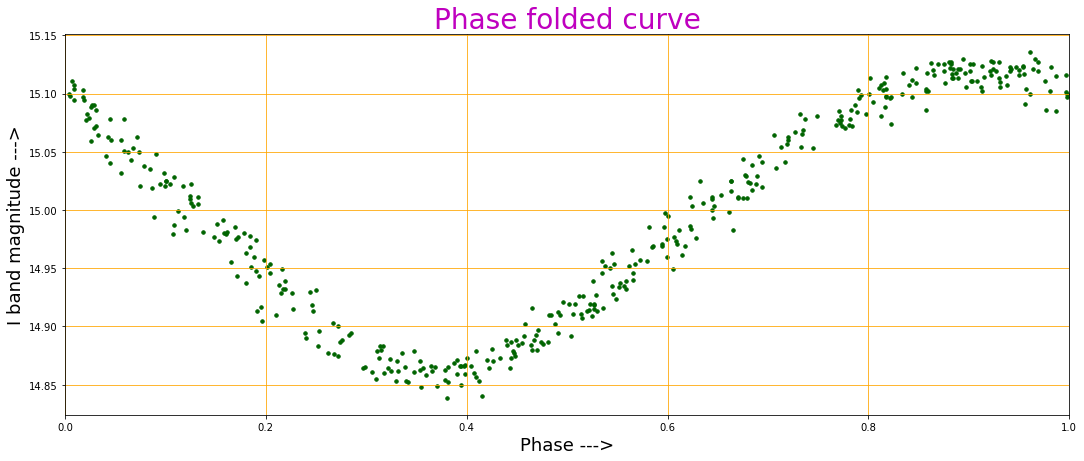

In [4]:
#time = observation time(in days)
#Imag = mean intensity band(in mag): dimensionless
#eImag = error in measurement of Imag entries
time, Imag, eImag = np.genfromtxt("OGLE-LMC-CEP-0010.dat", unpack = 1)

plt.figure(figsize = (16,6))
plt.scatter(time, Imag, s = 11, c = '#820000')
plt.title("Raw observation", size = 28, c = 'm')
plt.grid(c = 'y')
plt.xlabel("Time(in days) --->", fontsize = '18')
plt.ylabel("I band magnitude --->", fontsize = '18')
plt.show()

# Making the Lomb Scargle periodogram
freq, power = LombScargle(time, Imag, eImag).autopower(minimum_frequency = 0.001, maximum_frequency = 6)

#Plotting the Power vs frequency graph
plt.figure(figsize = (19,7))
plt.plot(freq, power, c = 'b')
plt.xlim(0,6)
plt.ylim(0,1.01)
plt.title("Power v Frequency", size = 28, c = 'm')
plt.xlabel('Frequency (in 1/day) --->', fontsize = '18')
plt.ylabel('Power --->', fontsize = '18')
plt.grid(c = 'y')
plt.show()

#Creating a period corresponding to the maximum power amplitude
freq_max = freq[np.where(power == np.amax(power))]
period = 1/freq_max
phase = time/period - time//period

#Plotting the pase folded curve
plt.figure(figsize = (18,7))
plt.title("Phase folded curve", size = 28, c = 'm')
plt.scatter(phase, Imag, s = 12, c = '#006400')
plt.xlim(0,1)

plt.xlabel("Phase --->", fontsize = '18')
plt.ylabel("I band magnitude --->", fontsize = '18')
plt.grid(c = '#FFA500')
plt.show()